In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Electrolyser

### Inputs:
Pressure of Reaction, 
Temperature of Reaction

In [2]:
'''
code to find the electrolysis energy requirement (kWh/kg)

function of T and P
'''
# enthalpy of oxygen as a function of temperature only
def enthalpy_O2(T):
    # Oxygen
    A = 31.32234
    B = -20.23531
    C = 57.86644
    D = -36.50624
    E = -0.007374
    F = -8.903471
    G = 246.7945
    H = 0

    t = (T)/1000   # in K (valid for 100K -- 700K)

    H_t_1_O2 = 0 + A*t + B*(t**2)/2 + C*(t**3)/3 + D*(t**4)/4 - E/t + F - H
    
    return H_t_1_O2 # in MJ/kmol. (kJ/mol)

# enthalpy of hydrogen as a function of temperature only
def enthalpy_H2(T):
    # Hydrogen
    A = 33.066178
    B = -11.363417
    C = 11.432816
    D = -2.772874
    E = -0.158558
    F = -9.980797
    G = 172.707974
    H = 0.0

    t = (T)/1000   # in K (valid for 298K -- 1000K)

    H_t_1_H2 = 0 + A*t + B*(t**2)/2 + C*(t**3)/3 + D*(t**4)/4 - E/t + F - H
    
    return H_t_1_H2 # in MJ/kmol. (kJ/mol)

# enthalpy of water as a function of temperature only
def enthalpy_H2O(T):
    # Liquid Water
    A = -203.6060
    B = 1523.290
    C = -3196.413
    D = 2474.455
    E = 3.855326
    F = -256.5478
    G = -488.7163
    H = -285.8304

    t = (T)/1000   # in K (valid for 298K -- 500K)

    H_t_1_H2O = -285.8 + A*t + B*(t**2)/2 + C*(t**3)/3 + D*(t**4)/4 - E/t + F - H
    
    return H_t_1_H2O # in MJ/kmol. (kJ/mol)

# enthalpy of oxygen as a function of temperature and pressure
def H_O2(T,P):

    # Convert bar to atm
    P = P*0.986923

    # Oxygen
    c1 = -2604
    c2 = 61457
    b1 = 42.6
    b2 = -17400

    H_t_1_O2 = enthalpy_O2(T)   # in MJ/kmol

    dP = P-1  # in atm (it is the change in pressure from 1 atm)
    R = 8.20573660809596*10**-5*10**6 # in atm cm^3/mol.K

    diff = (b1 + 2*b2/T)*dP + (c1 + 1.25*c2/(T**0.5) - (b1 + 2*b2/T)*(b1 + b2/T))*(dP**2)/(R*T)

    # Convert to kJ/kmol
    diff = diff * 0.101325

    # Convert to MJ/kmol
    diff = diff * 10**-3

    H_t_p_O2 = H_t_1_O2 + diff
    
    return H_t_p_O2

# enthalpy of hydrogen as a function of temperature and pressure
def H_H2(T,P):

    # convert bar to atm
    P = P*0.986923

    # Hydrogen
    c1 = -351
    c2 = 12760
    b1 = 20.5
    b2 = -1857

    H_t_1_H2 = enthalpy_H2(T)   # in MJ/kmol

    dP = P-1  # in atm (it is the change in pressure from 1 atm)
    R = 8.20573660809596*10**-5*10**6 # in atm cm^3/mol.K

    diff = (b1 + 2*b2/T)*dP + (c1 + 1.25*c2/(T**0.5) - (b1 + 2*b2/T)*(b1 + b2/T))*(dP**2)/(R*T)

    # Convert to kJ/kmol   (J/mol)
    diff = diff * 0.101325

    # Convert to MJ/kmol
    diff = diff * 10**-3

    H_t_p_H2 = H_t_1_H2 + diff
    
    return H_t_p_H2

# functions to define the gradient and intercept of the linear line for the enthalpy of water at T
def gradient(T):
    '''
    putting the data within the functions
    '''
    P = np.array([0,5,10,15,20,25,30,35,40,45,50])*10 # converting to bar
    H2O_20 = (np.array([83.914,88.607,93.281,97.934,102.57,107.18,111.77,116.34,120.90,125.44,129.95])-104.88)*18.015*10**-3-285.820
    H2O_50 = (np.array([209.34,213.64,217.94,222.23,226.51,230.79,235.05,239.31,243.56,247.80,252.03])-104.88)*18.015*10**-3-285.820
    H2O_100 = (np.array([419.17,422.85,426.62,430.39,434.17,437.95,441.74,445.54,449.33,453.14,456.94])-104.88)*18.015*10**-3-285.820
    '''
    putting the data within the functions
    '''
    
    gradient_20 = (H2O_20[10] - H2O_20[0])/(P[10] - P[0])
    gradient_100 = (H2O_100[10] - H2O_100[0])/(P[10] - P[0])
    
    m = (gradient_100 - gradient_20)/(373 - 293)
    c = gradient_20 - 293*m
    
    y = m*T + c
    
    return y

def intercept(T):
    '''
    putting the data within the functions
    '''
    P = np.array([0,5,10,15,20,25,30,35,40,45,50])*10 # converting to bar
    H2O_20 = (np.array([83.914,88.607,93.281,97.934,102.57,107.18,111.77,116.34,120.90,125.44,129.95])-104.88)*18.015*10**-3-285.820
    H2O_50 = (np.array([209.34,213.64,217.94,222.23,226.51,230.79,235.05,239.31,243.56,247.80,252.03])-104.88)*18.015*10**-3-285.820
    H2O_100 = (np.array([419.17,422.85,426.62,430.39,434.17,437.95,441.74,445.54,449.33,453.14,456.94])-104.88)*18.015*10**-3-285.820
    '''
    putting the data within the functions
    '''
    
    start_point_20 = H2O_20[0]
    start_point_100 = H2O_100[0]
    
    m = (start_point_100 - start_point_20)/(373 - 293)
    c = start_point_20 - m*293
    
    y = m*T + c
    
    return y

def H_H2O(T, P):
    
    m = gradient(T)
    c = intercept(T)
    
    y = m*(P-1) + c
    
    return y

# returns the enthalpy needed for electrolysis at T and P in MJ/kmol
def delta_H(T,P):
    
    H_hydrogen = H_H2(T,P)
    H_oxygen = H_O2(T,P)
    H_water = H_H2O(T,P)
    
    delta_H = H_hydrogen + 0.5*H_oxygen - H_water
    
    '''
    the data above is in MJ/kmol
    
    i.e. the above number for delta_H is the amount needed to convert 1kmol of H2O into 1kmol H2 and 1/2kmol O2
    
    below i have converted it to kWh/kg
    '''
    # convert to kg
    # 1kmol H2 = 2.016 kg H2
    delta_H = delta_H*(1/2.016)
    
    # the data is now in MJ/kg
    # 1 MJ = 1,000/3600 kWh
    delta_H = delta_H * (1000/3600)
    
    # the data is now in kWh/kg :)
    
    # including efficiency
    eff = 0.8
    delta_H = delta_H/eff
    
    return delta_H # kWh/kg

# Gas Compressor
### Inputs
input temp (K), input pressure (bar)      ---      output pressure has to be 500 bar

In [3]:
'''
code to find the gas compression energy requirement (kWh/kg)

starting Temp and Pressure
'''
def compressor(T0,P0,P1):

    # Input Parameters
    T01 = T0  # Kelvin
    P01 = P0 # Bar

    # Output Pressure
    P02 = P1 # Bar

    # compressor properties
    eff = 0.9

    # hydrogen properties
    gamma = 1.41
    cp = 14.2  # KJ/(kg.K)

    # ideal output temp
    T02_prime = T01*(P02/P01)**((gamma-1)/gamma)

    # actual output temp
    T02 = (T02_prime - T01)/eff + T01

    # first law
    # q-w = dh
    # h = cp*T
    work = cp*(T02 - T01)  # KJ/kg

    # convert to kWh/kg
    work = work / 3600
    
    return work, T02 # kWh/kg

# Water Pump

### Inputs
output pressure (bar), output temperature (K)


In [4]:
'''
Inputs:
T -> output temperature from pump (Kelvin)
P -> output pressure from pump (Bar)
'''

# including the heat demand
def water_pump(T,P):

    # output conditions
    P2 = P  # Bar
    T2 = T  # Kelvin

    # starting conditions
    T1 = 273 + 25  # Kelvin
    P1 = 1  # Bar
    
    # define efficiencies
    heating_eff = 1
    pumping_eff = 0.87

    heating_work = (H_H2O(T2, P1) - H_H2O(T1, P1))/heating_eff
    pumping_work = (H_H2O(T2, P2) - H_H2O(T2, P1))/pumping_eff

    work = heating_work + pumping_work  # in MJ/kmol. (kJ/mol)
    
    '''
    1 kmol H2O == 1 kmol H2
    '''
    # 1kmol H2O -> 2.016 kg H2
    work = work*(1/2.016)
    
    # the data is now in MJ/kg
    # 1 MJ = 1,000/3600 kWh
    work = work * (1000/3600)
    
    # the data is now in kWh/kg :)
    
    return work # kWh/kg

# Hydrogen Cooler

### Inputs
input temp

In [5]:
'''
need to take this out, or not include
'''
def cooler(T):

    # Hydrogen
    A = 33.066178
    B = -11.363417
    C = 11.432816
    D = -2.772874
    E = -0.158558
    F = -9.980797
    G = 172.707974
    H = 0.0

    t = (T)/1000   # in K (valid for 298K -- 1000K)

    H_t_1_H2 = 0 + A*t + B*(t**2)/2 + C*(t**3)/3 + D*(t**4)/4 - E/t + F - H

    t = (273+65)/1000
    end_H = 0 + A*t + B*(t**2)/2 + C*(t**3)/3 + D*(t**4)/4 - E/t + F - H

    q = end_H - H_t_1_H2   # in MJ/kmol

    # convert to kg
    # 1kmol H2 = 2.016 kg H2
    q = q*(1/2.016)

    # the data is now in MJ/kg

    # 1 MJ = 1,000/3600 kWh
    q = q * (1000/3600)

    # the data is now in kWh/kg :)

    return abs(q)/0.9 # kWh/kg

# Hydrogen Station

### Inputs

electrolysis Temp and Pressure. output end pressure

In [6]:
'''
T_E - electrolyser temperature
P_E - electrolyser pressure
P_O - final output pressure of Hydrogen
'''
def station(T_E, P_E, P_O):
    
    # T = kelvin
    # P = bar

    pump_work = water_pump(T_E,P_E)
    electrolyser_work = delta_H(T_E,P_E)
    compressor_work, temp = compressor(T_E,P_E,P_O)
    # heat exchanger requires negligable work
    # cooler_work = cooler(temp)

    work = pump_work + electrolyser_work + compressor_work # + cooler_work

    return work   # kWh/kg

# Analysis [1]


51.38198504960689

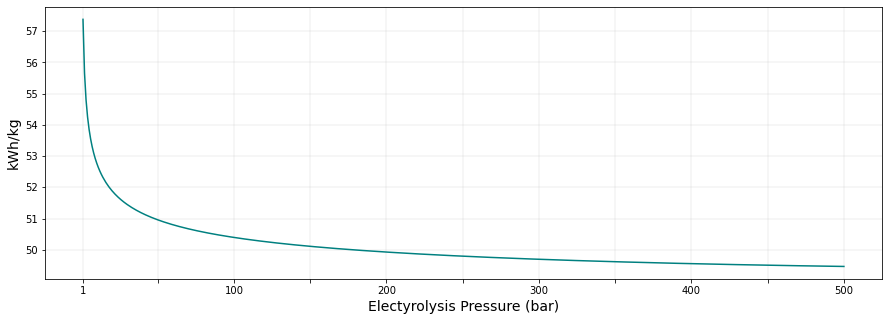

In [25]:
T_E = 273+80  #kelvin
P_O = 500  #bar

p = np.zeros(500)
hp_work = np.zeros(500)
lp_work = np.zeros(500)

for n in range(500):
    
    p[n] = n+1
    hp_work[n] = station(T_E, p[n], P_O)
   

    
    
fig, ax = plt.subplots(figsize=[15,5])

ax.plot(p, hp_work, color='teal')

# ax.title.set_text('Energy Demand for Electrolysis Station to 500 bar')
ax.grid(lw=0.2)
ax.set_ylabel('kWh/kg',fontsize=14)
ax.set_xlabel('Electyrolysis Pressure (bar)',fontsize=14)

my_xticks = [1,50,100,150,200,250,300,350,400,450,500]
my_xticks_names = ['1','','100','','200','','300','','400','','500']
ax.set_xticks(my_xticks)
ax.set_xticklabels(my_xticks_names)

hp_work[31]

# Analysis [2]

49.46492894934839
49.498028040150835
312


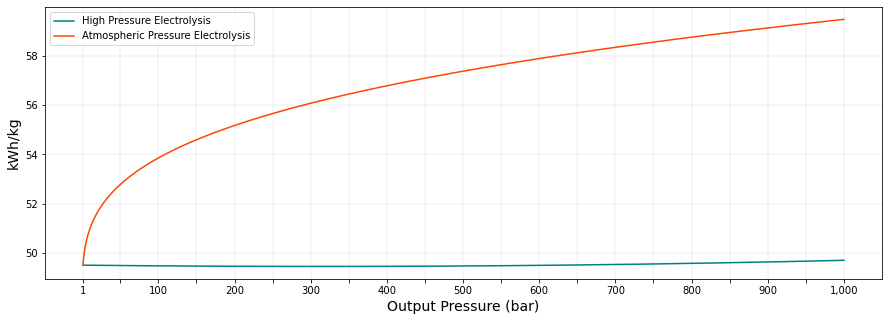

In [21]:
T_E = 273+80  #kelvin

p = np.zeros(1000)
hp_work = np.zeros(len(p))
lp_work = np.zeros(len(p))

for n in range(len(p)):
    
    p[n] = n+1
    # high pressure electrolysis
    # temp = T_E
    # electrolyser pressure = output pressure = p[n]
    hp_work[n] = station(T_E, p[n], p[n])
    # atmospheric electrolysis
    # temp = T_E
    # electrolyser pressure = 1 bar
    # output pressure = p[n]
    lp_work[n] = station(T_E, 1, p[n])
    

fig, ax = plt.subplots(figsize=[15,5])

ax.plot(p, hp_work, color='teal', label='High Pressure Electrolysis')
ax.plot(p, lp_work, color='orangered', label='Atmospheric Pressure Electrolysis')

# ax.title.set_text('Energy Demand for Electrolysis Station')
ax.grid(lw=0.2)
ax.set_ylabel('kWh/kg',fontsize=14)
ax.set_xlabel('Output Pressure (bar)',fontsize=14)
ax.legend()

my_xticks = [1,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
my_xticks_names = ['1','','100','','200','','300','','400','','500','','600','','700','','800','','900','','1,000']
ax.set_xticks(my_xticks)
ax.set_xticklabels(my_xticks_names)

print(hp_work[499])
print(hp_work[0])
print(np.argmin(hp_work))

# Analysis [3]

[]

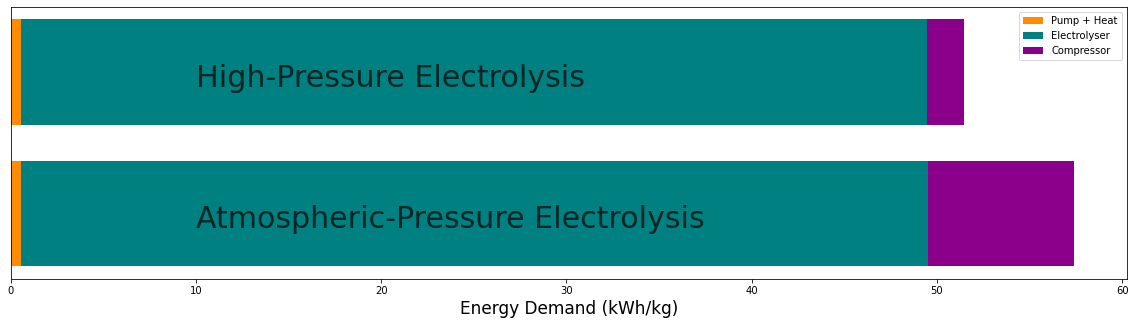

In [47]:
'''
for low pressure electrolysis
'''

T_E = 273+80  #kelvin
P_E = 1    #bar
P_O = 500  #bar

pump_work_1 = water_pump(T_E,P_E)
electrolyser_work_1 = delta_H(T_E,P_E)
compressor_work_1, temp = compressor(T_E,P_E,P_O)
# print(temp)
# cooler_work_1 = cooler(temp)

'''
for high pressure electrolysis
'''

T_E = 273+80  #kelvin
P_E = 30    #bar
P_O = 500  #bar

pump_work_2 = water_pump(T_E,P_E)
electrolyser_work_2 = delta_H(T_E,P_E)
compressor_work_2, temp = compressor(T_E,P_E,P_O)
# cooler_work_2 = cooler(temp)

pump = [pump_work_1, pump_work_2]
elec = [electrolyser_work_1, electrolyser_work_2]
com = [compressor_work_1, compressor_work_2]
# coo = [cooler_work_1, cooler_work_2]

sum1 = np.add(pump, elec).tolist()
sum2 = np.add(sum1, com).tolist()

fig, ax = plt.subplots(figsize=[20,5])

ax.barh([1,1.2],pump, label='Pump + Heat', height=0.15, color='darkorange')
ax.barh([1,1.2],elec, left=pump, label='Electrolyser', height=0.15, color='teal')
ax.barh([1,1.2],com, left=sum1, label='Compressor', height=0.15, color='darkmagenta')
# ax.barh([1,1.2],coo, left=sum2, label='cooler', height=0.15, color='darkorange')

ax.legend()

ax.set_xlabel('Energy Demand (kWh/kg)',fontsize=17)

ax.text(10,0.98,'Atmospheric-Pressure Electrolysis',fontsize=30,alpha=0.7)
ax.text(10,1.18,'High-Pressure Electrolysis',fontsize=30,alpha=0.7)
# ax.grid(lw=0.2)

my_xticks = []
my_xticks_names = []
ax.set_yticks(my_xticks)
ax.set_yticklabels(my_xticks_names)

In [10]:
compressor(273+80,1,500)

(7.878846645145075, 2350.4540790508645)

In [55]:
T_E = 273+80  #kelvin
P_E = 30    #bar
P_O = 500  #bar

pump_work_2 = water_pump(T_E,P_E)
electrolyser_work_2 = delta_H(T_E,P_E)
compressor_work_2, temp = compressor(T_E,P_E,P_O)

print(compressor_work_2+electrolyser_work_2+pump_work_2)

51.44776311385703
